In [17]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [18]:
df = pd.read_csv('token_dataframe.csv')

df

,timeStamp,hash,from,contractAddress,to,tokenName,tokenSymbol,value,dextools_volume5m,dextools_sellVolume5m,...,variationChain6h,price24h,priceChain24h,volume24h,sells24h,buys24h,sellVolume24h,buyVolume24h,variation24h,variationChain24h
0,2024-11-27 00:25:36,0xed7a8f57b5be7ad6c92d31b206b3294e5ccc47f9b1e6...,0x9008d19f58aabd9ed0d60971565aa8510560ab41,0x886ee721ef034026be078122fa55ab88c07907be,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Tardar Neko,TARDAR,16380062016205800637,0.0,0.0,...,0.000000,3.485853e-07,1.017728e-10,0.0,0,0,0,0,0.000000,0.000000
1,2024-11-27 03:41:52,0xacdf806c252831cd1ed71e51cb11d59cbda4f12cbcde...,0x967ccb4ea7b8a3e6bcef26a2d1bed1be5e590e3f,0x42069f08b5a8736f59948f0ab6a833d1bea23225,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Meme Run,MEMER,4206900000000000000,0.0,0.0,...,6.742760,2.579088e-08,7.529892e-12,0.0,0,0,0,0,-33.898372,-37.122029
2,2024-11-27 04:56:32,0xc5d82b103e54e897058c9396e1295e795b5cd2865c66...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Peanuts Brother,Wally,99987800000000000000,0.0,0.0,...,6.113540,1.558844e-04,4.565779e-08,0.0,0,0,0,0,96.191967,84.453369
3,2024-11-27 17:38:08,0x8a6c661b394c1b0f73f0bedf6dc8a91de300a6e00e2c...,0xeb725eea242f266db11c5e32a18d6f9657b1d857,0xa97705e891a1eb7085e1c8991ad55fbd5f6ef5ca,0x6b411100c72ba2445e50ffd20839c28b3546de7c,NASDANK,DANK,3000000000000000000000000000,0.0,0.0,...,17.937394,4.173929e-08,1.172361e-11,0.0,0,0,0,0,1334.791123,1323.786204
4,2024-11-27 23:55:44,0x881f5fdd60171598c40f6e0f6ff16867c152a0c0fad7...,0xd335f57ca647e21d7a5a0768934c1542d4fbd3f0,0xb09b5bbcbab0fb79fcbaa67643fe0d6af65bca01,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Smart Money Flow,FLOW,35000000000000000000,0.0,0.0,...,1.689385,3.921291e-06,1.068851e-09,0.0,0,0,0,0,3036.846362,3068.687445
5,2024-11-27 23:55:44,0xf9aba821a466eb324d113d376414a0adaf598f8d80ec...,0xd335f57ca647e21d7a5a0768934c1542d4fbd3f0,0xb09b5bbcbab0fb79fcbaa67643fe0d6af65bca01,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Smart Money Flow,FLOW,35000000000000000000,0.0,0.0,...,1.689385,3.921291e-06,1.068851e-09,0.0,0,0,0,0,3036.846362,3068.687445
6,2024-11-28 00:02:08,0x12a3f8f1e13ee2c2a44f6fe05d8a4bf27f5d907f38ab...,0xd335f57ca647e21d7a5a0768934c1542d4fbd3f0,0xb09b5bbcbab0fb79fcbaa67643fe0d6af65bca01,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Smart Money Flow,FLOW,35000000000000000000,0.0,0.0,...,1.689385,3.921291e-06,1.068851e-09,0.0,0,0,0,0,3036.846362,3068.687445
7,2024-11-28 00:02:08,0xcb5d3ba0c78c6b1d59337662a57f4d241e916af49067...,0xd335f57ca647e21d7a5a0768934c1542d4fbd3f0,0xb09b5bbcbab0fb79fcbaa67643fe0d6af65bca01,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Smart Money Flow,FLOW,35000000000000000000,0.0,0.0,...,1.689385,3.921291e-06,1.068851e-09,0.0,0,0,0,0,3036.846362,3068.687445
8,2024-11-28 00:42:40,0x502db6350cbe4337e34ba83546661225ecefdc1faec1...,0x6b82284a0cdb7549c002bad6b639fa3c50d37bb5,0x8475ec8b519025548c2417b82aa25bf58cd72b39,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Dogmon,DOGMON,8500000000000000000,0.0,0.0,...,8.331039,5.274749e-05,1.545103e-08,0.0,0,0,0,0,42.795761,34.386288
9,2024-11-28 00:51:12,0x658189ef3bb7837a076e455375134c36c05ca49f7c31...,0x12099b7b787d247cca2055bccaf00e6448084216,0x53dac5b23b3ca9a3c86aff8d0c7110fba72a9783,0x6b411100c72ba2445e50ffd20839c28b3546de7c,Peanuts Brother,Wally,6900000000000000000,0.0,0.0,...,6.113540,1.558844e-04,4.565779e-08,0.0,0,0,0,0,96.191967,84.453369


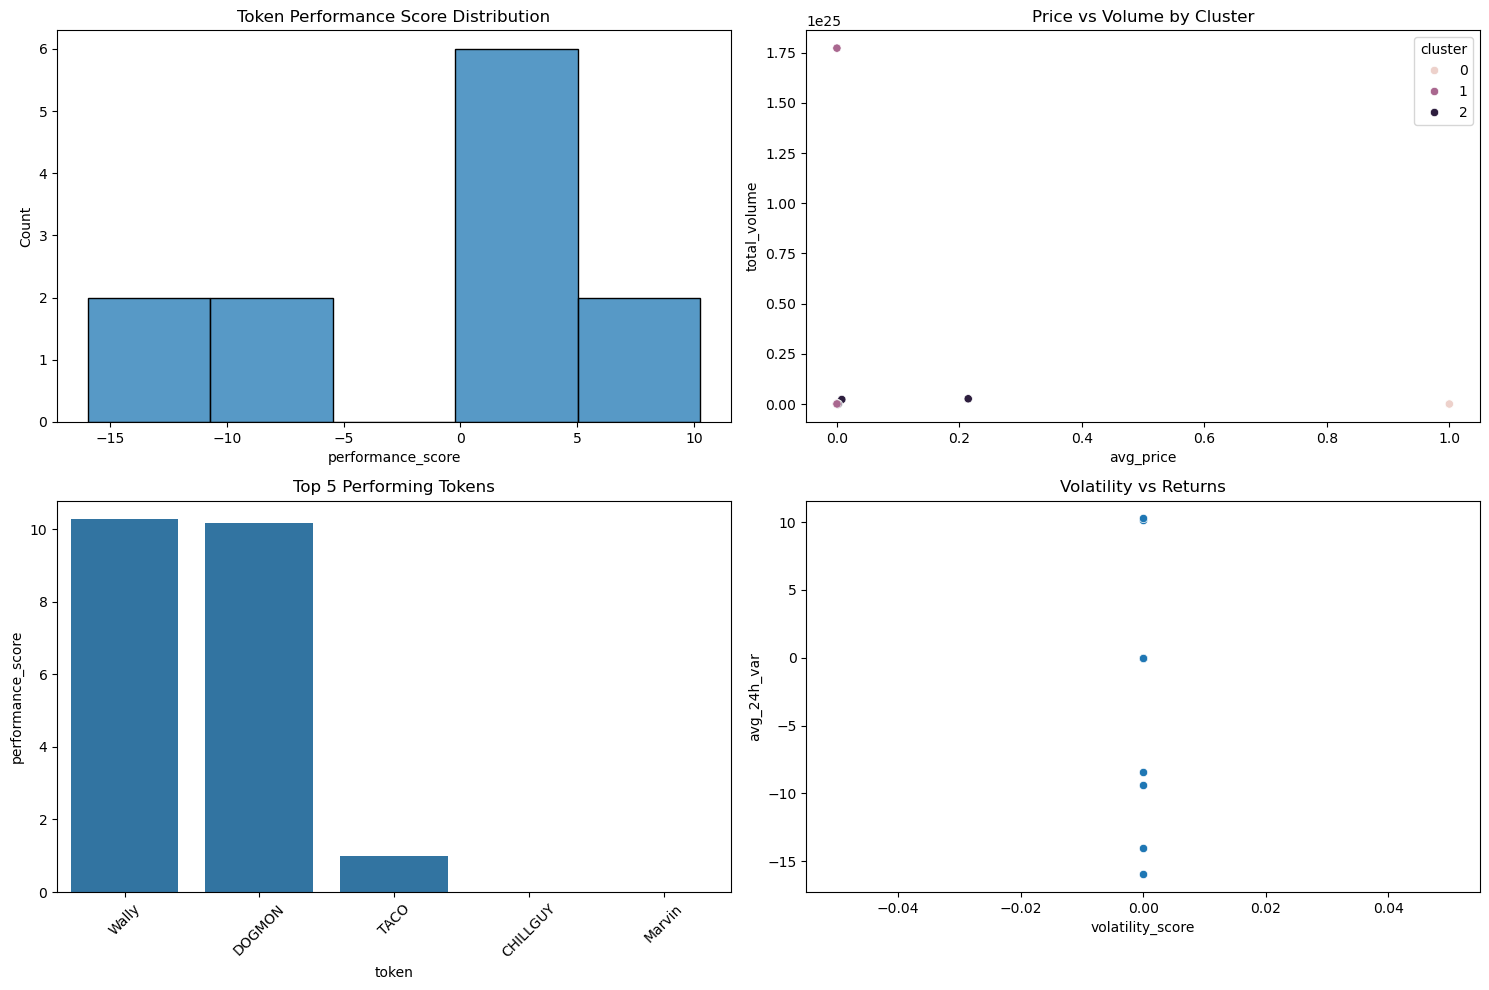


Top Performing Tokens:
       token  performance_score  avg_24h_var
11     Wally          10.274144    10.273919
4     DOGMON          10.159929    10.159920
9       TACO           1.000000     0.000000
2   CHILLGUY           0.001249     0.000000
7     Marvin           0.000501     0.000000

Most Volatile Tokens:
        token  volatility_score
0     AEROBUD               0.0
1  CATALORIAN               0.0
2    CHILLGUY               0.0
3        DOGE               0.0
4      DOGMON               0.0

Highest Volume Tokens:
        token  total_volume
9        TACO  1.772782e+25
3        DOGE  2.611441e+23
1  CATALORIAN  2.238764e+23
2    CHILLGUY  2.214318e+22
7      Marvin  8.888000e+21


In [15]:
# Load the data and convert numeric columns
df = pd.read_csv('token_dataframe.csv')

# Convert numeric columns
numeric_columns = ['value', 'price', 'variation5m', 'price1h', 'variation1h', 
                  'price6h', 'variation6h', 'price24h', 'variation24h']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 1. Data Preprocessing
# Convert timestamp to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Create features for analysis
df['hour'] = df['timeStamp'].dt.hour
df['day_of_week'] = df['timeStamp'].dt.dayofweek

# Calculate token metrics
token_metrics = df.groupby('tokenSymbol').agg({
    'price': ['mean', 'std'],
    'variation24h': ['mean', 'std'],
    'value': 'sum'
}).reset_index()

# Flatten multi-level columns
token_metrics.columns = ['token', 'avg_price', 'price_std', 'avg_24h_var', 'var_std', 'total_volume']

# 2. Token Performance Score (with error handling)
token_metrics['volatility_score'] = token_metrics['var_std'].div(token_metrics['avg_price']).fillna(0)
token_metrics['volume_score'] = (
    (token_metrics['total_volume'] - token_metrics['total_volume'].min()) / 
    (token_metrics['total_volume'].max() - token_metrics['total_volume'].min())
).fillna(0)
token_metrics['performance_score'] = (
    token_metrics['avg_24h_var'] + 
    token_metrics['volume_score'] - 
    token_metrics['volatility_score']
).fillna(0)

def train_price_prediction_model(token_data):
    # Prepare features
    features = ['variation5m', 'variation1h', 'variation6h', 'hour', 'day_of_week']
    X = token_data[features]
    y = token_data['price']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return model, mse, r2, features

# 4. Token Clustering
def cluster_tokens(metrics_df, n_clusters=3):
    features_for_clustering = ['avg_price', 'price_std', 'avg_24h_var', 'var_std']
    
    # Scale features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(metrics_df[features_for_clustering])
    
    # Handle missing values before clustering
    scaled_features = np.nan_to_num(scaled_features)
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    metrics_df['cluster'] = kmeans.fit_predict(scaled_features)
    
    return metrics_df

# 5. Generate Insights
def generate_insights(df, token_metrics):
    insights = {
        'top_performers': token_metrics.nlargest(5, 'performance_score')[['token', 'performance_score', 'avg_24h_var']],
        'most_volatile': token_metrics.nlargest(5, 'volatility_score')[['token', 'volatility_score']],
        'highest_volume': token_metrics.nlargest(5, 'total_volume')[['token', 'total_volume']]
    }
    
    return insights

# Execute analysis
token_metrics = cluster_tokens(token_metrics)
best_token = token_metrics.loc[token_metrics['performance_score'].idxmax(), 'token']
token_data = df[df['tokenSymbol'] == best_token]
model, mse, r2, features = train_price_prediction_model(token_data)

# Visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Performance Score Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=token_metrics, x='performance_score')
plt.title('Token Performance Score Distribution')

# Plot 2: Price vs Volume
plt.subplot(2, 2, 2)
sns.scatterplot(data=token_metrics, x='avg_price', y='total_volume', hue='cluster')
plt.title('Price vs Volume by Cluster')

# Plot 3: Top Performers
plt.subplot(2, 2, 3)
top_5 = token_metrics.nlargest(5, 'performance_score')
sns.barplot(data=top_5, x='token', y='performance_score')
plt.xticks(rotation=45)
plt.title('Top 5 Performing Tokens')

# Plot 4: Volatility vs Returns
plt.subplot(2, 2, 4)
sns.scatterplot(data=token_metrics, x='volatility_score', y='avg_24h_var')
plt.title('Volatility vs Returns')

plt.tight_layout()
plt.show()

# Print insights
insights = generate_insights(df, token_metrics)
print("\nTop Performing Tokens:")
print(insights['top_performers'])
print("\nMost Volatile Tokens:")
print(insights['most_volatile'])
print("\nHighest Volume Tokens:")
print(insights['highest_volume'])

# Save results
token_metrics.to_csv('token_analysis_results.csv', index=False)